In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
dataset= pd.read_csv("dataset.csv")
first = True

for col in dataset.columns:
    if first:
        first = False
        continue

    dataset[col] = dataset[col].apply(lambda x: x.replace(",", "."))
    dataset[col] = dataset[col].astype(float)

dataset

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [3]:
dataset_wo_date = dataset.drop("date", axis=1)

In [4]:
# check for missing values
print("Are there missing values?")
dataset.isna().values.any()

Are there missing values?


False

In [5]:
type(dataset["Amina Flow"].iloc[0])

numpy.float64

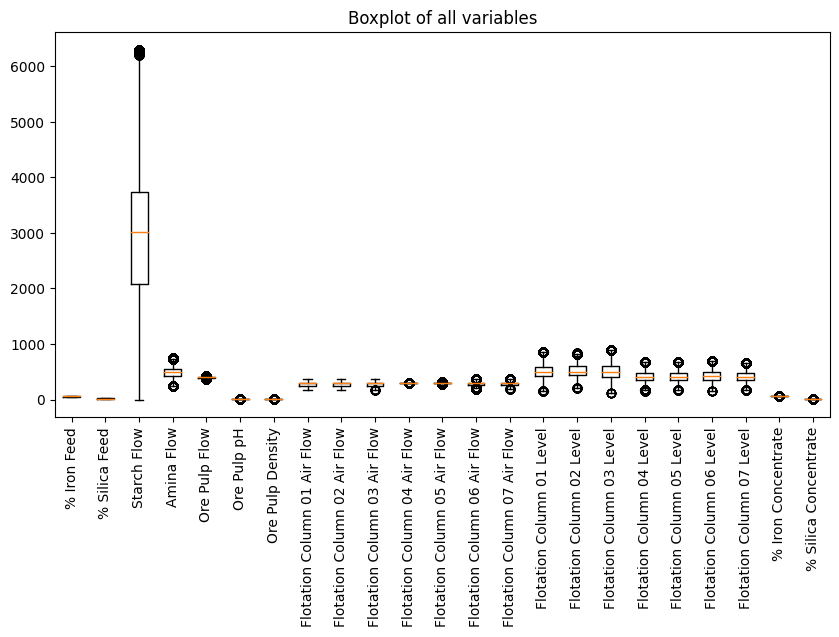

In [11]:
plt.title("Boxplot of all variables")
plt.boxplot(dataset_wo_date)
plt.xticks(range(1, len(dataset_wo_date.columns) + 1), dataset_wo_date.columns.to_list(), rotation=90)
plt.show()


In [7]:
results = {}
for ud in dataset.date.unique():
    if dataset.date.value_counts()[ud] != 180:
        if dataset.date.value_counts()[ud] in results:
            results[dataset.date.value_counts()[ud]].append(ud)
        else:
            results[dataset.date.value_counts()[ud]] = [ud]


results

{174: ['2017-03-10 01:00:00'], 179: ['2017-04-10 00:00:00']}

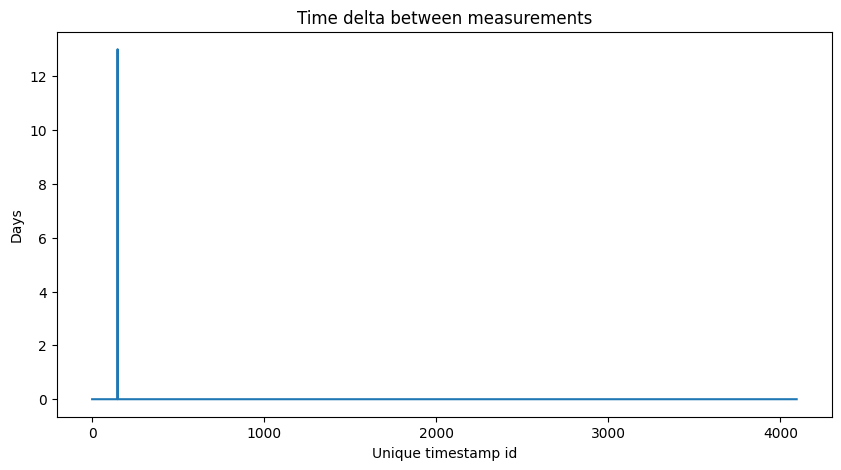

In [16]:
from datetime import datetime

udates = dataset.date.unique()
last = datetime.strptime(udates[0], '%Y-%m-%d %H:%M:%S')
res = []
for date in udates[1:]:
    dd = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    res.append((dd-last).days)
    last = dd

plt.title("Time delta between measurements")
plt.plot(res)
plt.xlabel("Unique timestamp id")
plt.ylabel("Days")
plt.show()